In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor 
warnings.filterwarnings("ignore")

In [2]:
seinfeld = pd.read_csv('seinfeld episode rankings.csv')

In [3]:
seinfeld

,Title,Plot,Quotability/cultural impact,Laughs,Total score,IMDb rating,IMDb rank,Notes,Season,episode
0,The Seinfeld Chronicles 1:1,4.0,7.0,7.0,8.521739,7.6,78.0,2nd button joke,1.0,1.0
1,Male Unbonding 1:2,3.0,6.5,2.0,1.695652,7.3,85.0,Kramer's pizza idea,1.0,2.0
2,The Stakeout 1:3,4.0,7.0,9.0,10.956522,7.7,74.0,Art Vandelay first appearance,1.0,3.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,78.0,NaN,1.0,4.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,80.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
176,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
seinfeld.columns=['title','plot','quotability','laughs','total_score','imdb_rating','imdb_rank','notes','season','episode']

In [5]:
seinfeld=seinfeld[seinfeld.laughs>0]

In [6]:
seinfeld.sort_values('total_score',ascending=False)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
78,The Marine Biologist,5.0,9.0,52.0,101.739130,9.2,4.0,NaN,5.0,14.0
84,The Hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0
51,The Contest 4:11,5.0,10.0,31.0,67.391304,9.6,1.0,first appearance of Estelle.,4.0,11.0
75,The Conversion,5.0,9.0,30.0,58.695652,8.1,54.0,NaN,5.0,11.0
85,The Opposite,4.0,9.0,31.5,49.304348,9.6,1.0,NaN,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
20,The Dog 3:4,3.0,3.0,7.0,2.739130,7.3,85.0,NaN,3.0,4.0
14,The Baby Shower 2:10,3.0,3.0,7.0,2.739130,7.5,80.0,NaN,2.0,10.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,80.0,NaN,1.0,5.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,78.0,NaN,1.0,4.0


In [7]:
scripts = pd.read_csv('seinfeld_data/scripts.csv')

In [8]:
episodes = pd.read_csv('seinfeld_data/episode_info.csv')

In [9]:
episodes = episodes.drop(columns='Unnamed: 0')

In [10]:
episodes.Title = episodes.Title.astype(str)

In [11]:
episodes.Title = episodes.Title.str.lower().str.replace(' ','_').str.replace(',','')

In [12]:
scripts = scripts.drop(columns='Unnamed: 0')

In [13]:
scripts[0:211].SEID = 'S01E00'
scripts[0:211].EpisodeNo = 0.0

In [14]:
episodes

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,1.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E01
1,1.0,1.0,the_stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,the_robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,male_unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,the_stock_tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...
169,9.0,17.0,the_bookstore,"April 9, 1998",Spike Feresten,Andy Ackerman,S09E17
170,9.0,18.0,the_frogger,"April 23, 1998","Gregg Kavet, Andy Robin",Andy Ackerman,S09E18
171,9.0,19.0,the_maid,"April 30, 1998","Alec Berg, David Mandel, Jeff Schaffer",Andy Ackerman,S09E19
172,9.0,20.0,the_puerto_rican_day,"May 7, 1998","Alec Berg, Jennifer Crittenden, Spike Feresten...",Andy Ackerman,S09E20


In [15]:
episodes.SEID[0] = 'S01E00'
episodes.EpisodeNo[0] = 0.0

In [16]:
scripts

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0
...,...,...,...,...,...
54611,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,S09E23,9.0
54612,PRISONER 3,You suck - I'm gonna cut you.,23.0,S09E23,9.0
54613,JERRY,"Hey, I don't come down to where you work, and ...",23.0,S09E23,9.0
54614,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,S09E23,9.0


In [17]:
scripts[scripts.SEID=='S01E00']

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0
...,...,...,...,...,...
206,LAURA,"Yeah, yeah, hes a great guy...",0.0,S01E00,1.0
207,JERRY,Yeah.,0.0,S01E00,1.0
208,LAURA,"Youd really like him, you know, I cant wait to...",0.0,S01E00,1.0
209,JERRY,Me too!,0.0,S01E00,1.0


In [18]:
scripts.Character=scripts.Character.str.replace(r"\(.*\)","")

In [19]:
line_count=scripts.Character.value_counts().head(475)

In [20]:
scripts.Character.str.strip().value_counts().head(10)

JERRY       14905
GEORGE       9781
ELAINE       8073
KRAMER       6723
NEWMAN        649
MORTY         507
HELEN         474
FRANK         438
SUSAN         382
[Setting      293
Name: Character, dtype: int64

In [21]:
episodes["SEID"] = episodes.SEID.astype(str)
scripts["SEID"] = scripts.SEID.astype(str)

In [22]:
scripts[scripts.SEID=='S01E04']

,Character,Dialogue,EpisodeNo,SEID,Season
1078,JERRY,Went out to dinner the other night. Check came...,4.0,S01E04,1.0
1079,JERRY,I think Superman probably has a very good sens...,4.0,S01E04,1.0
1080,GEORGE,I never heard him say anything really funny.,4.0,S01E04,1.0
1081,JERRY,"But its common sense. Hes got super strength, ...",4.0,S01E04,1.0
1082,GEORGE,"You would think that, but either youre born wi...",4.0,S01E04,1.0
...,...,...,...,...,...
1303,JERRY,We went over that.,4.0,S01E04,1.0
1304,GEORGE,Pst. (moves in close with Elaine and Jerry) Wi...,4.0,S01E04,1.0
1305,JERRY,A robot butcher?,4.0,S01E04,1.0
1306,GEORGE,"Shhhhh. If you want to get in, theres very lit...",4.0,S01E04,1.0


In [23]:
pd.merge(episodes, right=scripts, on='SEID')

,Season_x,EpisodeNo_x,Title,AirDate,Writers,Director,SEID,Character,Dialogue,EpisodeNo_y,Season_y
0,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,Do you know what this is all about? Do you kno...,0.0,1.0
1,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,1.0
2,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,Are you through?,0.0,1.0
3,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"You do of course try on, when you buy?",0.0,1.0
4,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
54611,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,9.0
54612,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,PRISONER 3,You suck - I'm gonna cut you.,23.0,9.0
54613,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",23.0,9.0
54614,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,9.0


In [24]:
seinfeld.title[0] = 'good_news_bad_news'

In [25]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,78.0,2nd button joke,1.0,1.0
1,Male Unbonding 1:2,3.0,6.5,2.0,1.695652,7.3,85.0,Kramer's pizza idea,1.0,2.0
2,The Stakeout 1:3,4.0,7.0,9.0,10.956522,7.7,74.0,Art Vandelay first appearance,1.0,3.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,78.0,NaN,1.0,4.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,80.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
81,The Wife,4.0,8.0,23.0,32.000000,8.0,62.0,NaN,5.0,17.0
82,The Raincoats,3.0,8.0,38.0,19.826087,8.3,36.0,NaN,5.0,18.0
83,The Fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0
84,The Hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0


In [26]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,78.0,2nd button joke,1.0,1.0
1,Male Unbonding 1:2,3.0,6.5,2.0,1.695652,7.3,85.0,Kramer's pizza idea,1.0,2.0
2,The Stakeout 1:3,4.0,7.0,9.0,10.956522,7.7,74.0,Art Vandelay first appearance,1.0,3.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,78.0,NaN,1.0,4.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,80.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
81,The Wife,4.0,8.0,23.0,32.000000,8.0,62.0,NaN,5.0,17.0
82,The Raincoats,3.0,8.0,38.0,19.826087,8.3,36.0,NaN,5.0,18.0
83,The Fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0
84,The Hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0


In [27]:
episodes.columns = episodes.columns.str.lower()


In [28]:
seinfeld.title.tolist()

['good_news_bad_news',
 'Male Unbonding 1:2',
 'The Stakeout 1:3',
 'The Robbery 1:4',
 'The Stock Tip 1:5',
 'The Ex Girlfriend 2:1 ',
 'The Pony Remark 2:2',
 'The Jacket 2:3',
 'The Phone Message 2:4',
 'The Apartment 2:5',
 'The Statue 2.6',
 'The Revenge 2:7',
 'The Heart Attack 2:8',
 'The Deal 2:9',
 'The Baby Shower 2:10',
 'The Chinese Restaurant 2:11',
 'The Busboy 2:12',
 'The Note 3:1',
 'The Truth 3:2',
 'The Pen 3:3',
 'The Dog 3:4',
 'The Library 3:5',
 'The Parking Garage 3:6',
 'The Cafe 3:7',
 'The Tape 3:8',
 'The Nose Job 3:9',
 'The Stranded 3:10',
 'The Alternate Side 3:11',
 'The Red Dot 3:12',
 'The Subway 3:13',
 'The Pez Dispenser 3:14',
 'The Suicide 3:15',
 'The Fix Up 3:16',
 'The Boyfriend (1)',
 'The Boyfriend (2)',
 'The New Friend 3:18',
 'The Limo 3:19',
 'The Good Samaritan 3:20',
 'The Letter 3:21',
 'The Parking Space 3:22',
 'The Keys 3:23',
 'The Trip (1)',
 'The Trip (2)',
 'The Pitch 4:3',
 'The Ticket 4:4',
 'The Wallet (1)',
 'The Watch (2)',


In [29]:
seinfeld.title = seinfeld.title.str.replace(r" \d.\d*","").str.strip().str.replace(' ','_').str.lower()

In [30]:
seinfeld[seinfeld.title==r"the_cafe"]

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
23,the_cafe,4.0,6.0,9.5,9.913043,8.4,24.0,Babu’s first appearance,3.0,7.0


In [32]:
episodes[episodes.title=='the_cafe']

,season,episodeno,title,airdate,writers,director,seid
23,3.0,7.0,the_cafe,"November 6, 1991",Tom Leopold,Tom Cherones,S03E07


In [35]:
seinfeld.title.tolist()

['good_news_bad_news',
 'male_unbonding',
 'the_stakeout',
 'the_robbery',
 'the_stock_tip',
 'the_pony_remark',
 'the_jacket',
 'the_phone_message',
 'the_apartment',
 'the_statue',
 'the_revenge',
 'the_heart_attack',
 'the_deal',
 'the_note',
 'the_truth',
 'the_pen',
 'the_dog',
 'the_library',
 'the_parking_garage',
 'the_tape',
 'the_nose_job',
 'the_pitch',
 'the_ticket',
 'the_bubble_boy',
 'the_cheever_letters',
 'the_opera',
 'the_shoes',
 'the_outing',
 'the_old_man',
 'the_implant',
 'the_junior_mint',
 'the_smelly_car',
 'the_handicap_spot',
 'the_mango',
 'the_puffy_shirt',
 'the_glasses',
 'the_sniffing_accountant',
 'the_bris',
 'the_lip_reader',
 'the_non-fat_yogurt',
 'the_barber',
 'the_masseuse',
 'the_conversion',
 'the_stall',
 'the_dinner_party',
 'the_marine_biologist',
 'the_pie',
 'the_stand-in',
 'the_wife']

In [33]:
seinfeld=pd.merge(seinfeld, right = episodes, on='title')

In [34]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
5,the_pony_remark,4.0,5.0,8.0,6.956522,7.9,67.0,NaN,2.0,2.0,2.0,2.0,"January 30, 1991","Larry David, Jerry Seinfeld",Tom Cherones,S02E02
6,the_jacket,5.0,6.0,8.5,11.086957,8.3,35.0,NaN,2.0,3.0,2.0,3.0,"February 6, 1991","Larry David, Jerry Seinfeld",Tom Cherones,S02E03
7,the_phone_message,4.0,3.0,13.5,7.043478,8.4,24.0,Tippy-toe!,2.0,4.0,2.0,4.0,"February 13, 1991","Larry David, Jerry Seinfeld",Tom Cherones,S02E04
8,the_apartment,2.0,7.0,9.5,5.782609,7.9,67.0,"Elaine's first ""GET OUT""",2.0,5.0,2.0,5.0,"April 4, 1991",Peter Mehlman,Tom Cherones,S02E05
9,the_statue,3.0,3.0,12.5,4.891304,8.0,60.0,NaN,2.0,6.0,2.0,6.0,"April 11, 1991",Larry David,Tom Cherones,S02E06


In [33]:
seinfeld.sort_values('total_score',ascending=True).head(10)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
13,the_baby_shower,3.0,3.0,7.0,2.739130,7.5,78.0,NaN,2.0,10.0,2.0,10.0,"May 16, 1991",Larry Charles,Tom Cherones,S02E10
19,the_dog,3.0,3.0,7.0,2.739130,7.3,83.0,NaN,3.0,4.0,3.0,4.0,"October 9, 1991",Larry David,Tom Cherones,S03E04
17,the_truth,3.0,3.0,7.5,2.934783,7.8,71.0,NaN,3.0,2.0,3.0,2.0,"September 25, 1991",Elaine Pope,David Steinberg,S03E02
12,the_deal,2.0,3.0,12.0,3.130435,8.3,35.0,NaN,2.0,9.0,2.0,9.0,"May 2, 1991",Larry Charles,Tom Cherones,S02E09
11,the_heart_attack,2.0,5.0,10.0,4.347826,7.9,67.0,NaN,2.0,8.0,2.0,8.0,"April 25, 1991",Larry Charles,Tom Cherones,S02E08
9,the_statue,3.0,3.0,12.5,4.891304,8.0,60.0,NaN,2.0,6.0,2.0,6.0,"April 11, 1991",Larry David,Tom Cherones,S02E06
29,the_suicide,3.0,4.0,10.5,5.478261,7.5,78.0,Wayne Knight's first appearance as newman,3.0,15.0,3.0,15.0,"January 29, 1992",Tom Leopold,Tom Cherones,S03E15


In [34]:
seinfeld.director = seinfeld.director.replace('David&nbsp; Steinberg','David Steinberg')

In [35]:
seinfeld.director.value_counts()

Tom Cherones       68
David Steinberg     2
Art Wolff           1
Joshua White        1
Jason Alexander     1
Name: director, dtype: int64

In [36]:
scripts.Character = scripts.Character.str.strip()
scripts.Character = scripts.Character.replace(r'babu.*|BABU.*','BABU')

In [37]:
scripts.Character.nunique()

1214

In [38]:
scripts=scripts[~scripts.Character.str.contains(r'\(\*|[a-z]|http')]

In [39]:
#scripts = scripts.drop(index=scripts[(scripts.Character==r'http')|(scripts.Dialogue.isnull())].index.tolist())
grouped_scripts=scripts.groupby('SEID')

In [40]:
for key, item in grouped_scripts:
    print(grouped_scripts.get_group(key), "\n\n")

    Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season  
0    S01E00     1.0  
1    S0

[301 rows x 5 columns] 


      Character                                           Dialogue  EpisodeNo  \
22025     JERRY  The whale is supposed to be such an intelligen...       12.0   
22026    ELAINE  Oh, I can't believe this. What a dope! uh..exc...       12.0   
22027      JANE  (from the stall on Elaine's right) Are you tal...       12.0   
22028    ELAINE  yeah.. I I just forgot to check so if you coul...       12.0   
22029      JANE                                       No I'm sorry       12.0   
...         ...                                                ...        ...   
22377    ELAINE                                      here, take it       12.0   
22378     JERRY                                             thanks       12.0   
22379      JANE  (walks out of the bathroom, very furious; to J...       12.0   
22380      JANE    (to Kramer, in a very sensual voice) you either       12.0   
22381     JERRY  Now of the course the thing is Extreme sports....       12.0   

 

[346 rows x 5 columns] 


      Character                                           Dialogue  EpisodeNo  \
50699    GEORGE  When are they gonna have the flying cars, alre...       11.0   
50700     JERRY  Yeah, they have been promising that for a while..       11.0   
50701    GEORGE  Years. When we were kids, they made it seem li...       11.0   
50702     JERRY                     I think Ed Begley Jr. has one.       11.0   
50703    GEORGE                          No. That's just electric.       11.0   
...         ...                                                ...        ...   
51045    ELAINE                                         Very near.       11.0   
51046    KRAMER  Ya-hoo! Ya-hoo! (Rick is silent) Whew! Well, I...       11.0   
51047      RICK      You - you can probably let go of my hand now.       11.0   
51048    KRAMER  Yeah, yeah. (Getting out of the car) Well, Ill...       11.0   
51049      RICK                               Do you have my card?       11.0   

 

In [41]:
seinfeld.writers.value_counts()

Larry David                                               17
Larry Charles                                             13
Larry David, Jerry Seinfeld                               11
Peter Mehlman                                              8
Bruce Kirschbaum                                           2
Tom Gammill, Max Pross                                     2
Andy Robin                                                 2
Larry David, Larry Charles                                 2
Larry David and Bill Masters                               1
Tom Leopold                                                1
Larry Charles / Story By Marc Jaffe                        1
Larry David and Greg Daniels                               1
Matt Goldman                                               1
Steve Skrovan, Bill Masters, Jon Hayman                    1
Larry David, Jerry Seinfeld and Matt Goldman               1
Larry David and Bob Shaw, Don McEnery                      1
Larry David, Peter Mehlm

In [42]:
scripts = scripts.drop(index=scripts[scripts.Character=='http'].index.tolist())

In [43]:
for Character, Dialogue in grouped_scripts:
    #print(f'{SEID}')
    print('--------')
    print(f'{Character}: {Dialogue}')

--------
S01E00:     Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season  
0    S01E00 

[349 rows x 5 columns]
--------
S05E10:       Character                                           Dialogue  EpisodeNo  \
21384     JERRY  You can always tell what was the best year of ...       10.0   
21385     JERRY    How would you describe the smell in this house?       10.0   
21386    ELAINE                               (sniffing) Dandruff?       10.0   
21387     JERRY           Yeah, that's part of it. (sniffs) Kasha?       10.0   
21388    ELAINE                                There's some kasha.       10.0   
...         ...                                                ...        ...   
21718     JERRY                                            Elaine!       10.0   
21719  AL ROKER  Guess your boyfriend's gonna have to catch the...       10.0   
21720    ELAINE                             He's not my boyfriend.       10.0   
21721  AL ROKER          He's not? Interesting. (gives a big grin)       10.0   
21722     JERRY  I was always excited as a kid, when that new T...   

[347 rows x 5 columns]
--------
S05E18:       Character                                           Dialogue  EpisodeNo  \
24077     JERRY           You know their timing couldn't be worse.       18.0   
24078    GEORGE  Is there ever a good time to have your parents...       18.0   
24079     JERRY  You don't understand, I haven't been together ...       18.0   
24080    GEORGE                   When are they leaving for Paris?       18.0   
24081     JERRY                        Not for another three days.       18.0   
...         ...                                                ...        ...   
24802    NEWMAN               (running out the door) Jerry! Jerry!       18.0   
24803    GEORGE                    Where the hell is your father?!       18.0   
24804   ESTELLE                This is the best thing we ever did.       18.0   
24805     FRANK  I just hope those exterminators know what they...       18.0   
24806   ESTELLE                 Ah forget about them let's just...   

[341 rows x 5 columns]
--------
S09E16:       Character                                           Dialogue  EpisodeNo  \
52336     PUDDY            Alright, be careful with the car, babe.       16.0   
52337    ELAINE                                        Yeah, yeah.       16.0   
52338     PUDDY  And don't move the seat, I got it right where ...       16.0   
52339    ELAINE                                           Goodbye?       16.0   
52340     PUDDY                                 Two and ten, babe.       16.0   
...         ...                                                ...        ...   
52617    KRUGER  (getting up to leave) Thank you George, you've...       16.0   
52618    GEORGE  Oh no, you're not going out on a high note wit...       16.0   
52619    KRUGER                                       It's K-uger!       16.0   
52620    GEORGE                                            No! No!       16.0   
52621    KRUGER                               Goodnight everybody!   

In [44]:
import dask.dataframe as dd

In [45]:
scripts_dd=dd.from_pandas(scripts,npartitions=54615)

In [46]:
scripts_dd

,Character,Dialogue,EpisodeNo,SEID,Season
npartitions=53961,,,,,
0,object,object,float64,object,float64
1,...,...,...,...,...
...,...,...,...,...,...
54614,...,...,...,...,...
54615,...,...,...,...,...


In [62]:
seinfeld_prepped.corr()

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,writers_Andy Robin,writers_Bruce Kirschbaum,...,"writers_Peter Mehlman, Carol Leifer","writers_Ron Hague, Charlie Rubin","writers_Steve Skrovan, Bill Masters, Jon Hayman","writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
plot,1.000000,0.409143,0.403960,0.593461,0.444855,-0.456992,0.237706,0.122009,0.045849,0.045849,...,0.179079,0.179079,0.032194,-0.058744,-0.114691,-0.114691,-0.058744,-0.114691,-0.114691,0.128705
quotability,0.409143,1.000000,0.552089,0.656779,0.480701,-0.454776,0.618070,0.324553,0.176372,0.090823,...,0.123845,0.123845,0.123845,0.133597,0.063774,-0.176509,-0.165825,0.003703,0.003703,0.102053
laughs,0.403960,0.552089,1.000000,0.908158,0.584421,-0.535574,0.686828,0.396452,0.095285,0.104615,...,0.410865,0.463278,-0.073952,0.099950,0.279833,-0.080504,-0.109983,-0.047746,-0.119813,0.206335
total_score,0.593461,0.656779,0.908158,1.000000,0.610807,-0.545068,0.597139,0.324244,0.119223,0.128305,...,0.455635,0.505004,-0.028188,0.059656,-0.011732,-0.102243,-0.105083,-0.061924,-0.093603,0.177696
imdb_rating,0.444855,0.480701,0.584421,0.610807,1.000000,-0.949654,0.396180,0.312872,0.101188,-0.070997,...,0.155686,0.228229,-0.037762,0.032314,0.010600,-0.182848,-0.002123,-0.061943,0.083143,0.064631
imdb_rank,-0.456992,-0.454776,-0.535574,-0.545068,-0.949654,1.000000,-0.384388,-0.296815,-0.154694,0.104482,...,-0.167710,-0.172437,0.054457,-0.073912,-0.025901,0.177358,0.003504,0.092273,-0.110986,-0.070919
season_y,0.237706,0.618070,0.686828,0.597139,0.396180,-0.384388,1.000000,0.345150,0.135638,0.135638,...,0.143191,0.143191,0.047292,0.203924,0.143191,-0.048606,-0.069222,-0.048606,-0.048606,0.200099
episodeno,0.122009,0.324553,0.396452,0.324244,0.312872,-0.296815,0.345150,1.000000,0.090077,0.103021,...,0.190498,0.063250,0.063250,-0.039364,0.135963,0.081429,-0.142918,0.172320,-0.100354,0.147251
writers_Andy Robin,0.045849,0.176372,0.095285,0.119223,0.101188,-0.154694,0.135638,0.090077,1.000000,-0.028169,...,-0.019780,-0.019780,-0.019780,-0.028169,-0.019780,-0.019780,-0.028169,-0.019780,-0.019780,0.045511
writers_Bruce Kirschbaum,0.045849,0.090823,0.104615,0.128305,-0.070997,0.104482,0.135638,0.103021,-0.028169,1.000000,...,-0.019780,-0.019780,-0.019780,-0.028169,-0.019780,-0.019780,-0.028169,-0.019780,-0.019780,0.045511


In [48]:
seinfeld_prepped=seinfeld.drop(columns=['season_x','episode','notes','title','seid','airdate'])

In [49]:
#seinfeld_prepped.airdate=pd.to_datetime(seinfeld_prepped.airdate)
#seinfeld_prepped = seinfeld_prepped.set_index('airdate').sort_values(by='airdate')

In [50]:
seinfeld_prepped = pd.get_dummies(seinfeld_prepped, columns=['writers','director'], drop_first=True)

In [51]:
train=seinfeld_prepped[seinfeld_prepped.season_y<4]
validate=seinfeld_prepped[seinfeld_prepped.season_y>3]

In [52]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,writers_Andy Robin,writers_Bruce Kirschbaum,...,"writers_Peter Mehlman, Carol Leifer","writers_Ron Hague, Charlie Rubin","writers_Steve Skrovan, Bill Masters, Jon Hayman","writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
0,4.0,7.0,7.0,8.521739,7.6,76.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,6.5,2.0,1.695652,7.3,83.0,1.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,7.0,9.0,10.956522,7.7,72.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,3.5,5.5,2.510870,7.6,76.0,1.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,3.0,6.5,2.543478,7.5,78.0,1.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4.0,5.0,8.0,6.956522,7.9,67.0,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,5.0,6.0,8.5,11.086957,8.3,35.0,2.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,4.0,3.0,13.5,7.043478,8.4,24.0,2.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2.0,7.0,9.5,5.782609,7.9,67.0,2.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,3.0,3.0,12.5,4.891304,8.0,60.0,2.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
def get_script():
    for i in seinfeld.seid.to_list():
        for episode in scripts.SEID.to_list():
            script=f'TITLE: {i}\n'
            if str(scripts.SEID) == str(i):
                script += f'{scripts.Character}: {scripts.Dialogue}'
            else:
                continue
            return(script)

In [54]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,the_wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0,5.0,17.0,"March 17, 1994",Peter Mehlman,Tom Cherones,S05E17
69,the_raincoats,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0,5.0,18.0,April 28 1994,"Tom Gammill, Max Pross and Larry David, Jerry ...",Tom Cherones,S05E18
70,the_fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0,5.0,20.0,"May 5, 1994",Larry Charles,Tom Cherones,S05E20
71,the_hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0,5.0,21.0,"May 12, 1994","Peter Mehlman, Carol Leifer",Tom Cherones,S05E21


In [55]:
start = scripts.index[scripts.SEID=='S01E00'][0]
end = scripts.index[scripts.SEID=='S01E00'][-1] +1

In [56]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,the_wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0,5.0,17.0,"March 17, 1994",Peter Mehlman,Tom Cherones,S05E17
69,the_raincoats,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0,5.0,18.0,April 28 1994,"Tom Gammill, Max Pross and Larry David, Jerry ...",Tom Cherones,S05E18
70,the_fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0,5.0,20.0,"May 5, 1994",Larry Charles,Tom Cherones,S05E20
71,the_hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0,5.0,21.0,"May 12, 1994","Peter Mehlman, Carol Leifer",Tom Cherones,S05E21


In [57]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,writers_Andy Robin,writers_Bruce Kirschbaum,...,"writers_Peter Mehlman, Carol Leifer","writers_Ron Hague, Charlie Rubin","writers_Steve Skrovan, Bill Masters, Jon Hayman","writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
0,4.0,7.0,7.0,8.521739,7.6,76.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,6.5,2.0,1.695652,7.3,83.0,1.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,7.0,9.0,10.956522,7.7,72.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,3.5,5.5,2.510870,7.6,76.0,1.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,3.0,6.5,2.543478,7.5,78.0,1.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4.0,5.0,8.0,6.956522,7.9,67.0,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,5.0,6.0,8.5,11.086957,8.3,35.0,2.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,4.0,3.0,13.5,7.043478,8.4,24.0,2.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2.0,7.0,9.5,5.782609,7.9,67.0,2.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,3.0,3.0,12.5,4.891304,8.0,60.0,2.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
x_train = train.drop(columns=['plot','quotability','laughs','total_score'])
y_train = train.total_score
x_validate = validate.drop(columns=['plot','quotability','laughs','total_score'])
y_validate = validate.total_score

In [59]:
regr = MLPRegressor( max_iter=500).fit(x_train, y_train)

In [60]:
predictions=pd.DataFrame(regr.predict(x_validate),columns=['predict'])
y_validate=pd.concat([y_validate.reset_index(),predictions],axis=1)

<AxesSubplot:>

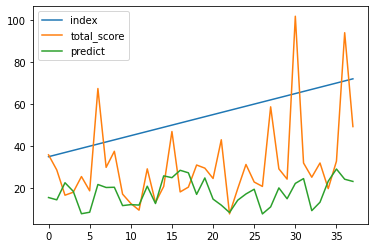

In [61]:
y_validate.plot()